# Gold Price Prediction - Machine Learning Project

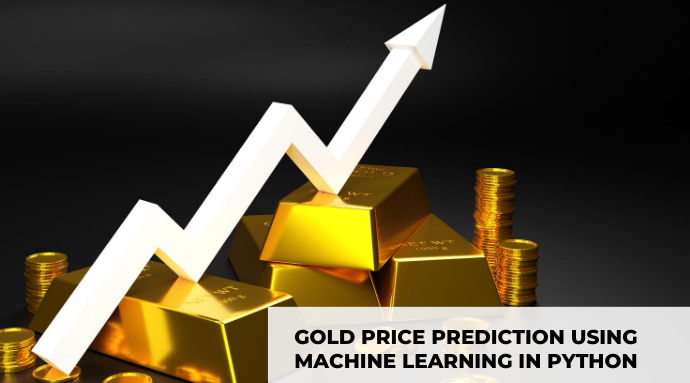

## Data Description:
The dataset gives you information about the gold price based on several other stock prices, We will analyze the gold price and build the best machine learning model to predict the gold price.

## Data set columns:
•Date- mm/dd/yyyy

•SPX- is a free float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in US.

•GLD- Gold Price
(GLD is the largest Exchange traded fund to invest directly in physical gold.Every unit of a Gold ETF represents one gram of gold and is of 99.5% purity.)

•USO- United States Oil Fund (price of oil in the US)

•SLV- Silver Price

•EUR/USD- The Currency pair quotation of the euro against U.S. dollar pair.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Collection and Processing 

In [2]:
data = pd.read_csv('gldprice_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05/08/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,01/02/2008,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,01/03/2008,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,01/04/2008,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# number of rows and columns
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#checking null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Data Visualization 

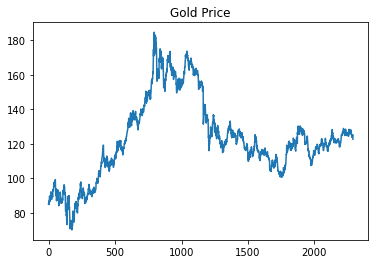

In [8]:
# Price history
plt.plot(data['GLD'])
plt.title('Gold Price')
plt.show()

HeatMap to understand Correlation

Text(0.5, 1.0, 'Feature Corelation using Heatmap ')

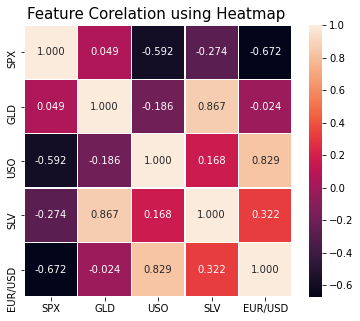

In [9]:
# Plotting heatmap to analyze the dependency and relationship between features

corr = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)

plt.title('Feature Corelation using Heatmap ', size=15, loc="center")

We see that SLV feature is heavily correlated with GLD

In [10]:
# Printing the factors on which “GLD” factor depends on most in descending order
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

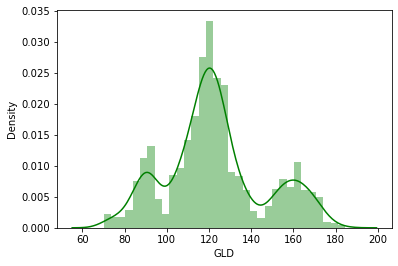

In [11]:
# Checking the distribution of gold price
sns.distplot(data['GLD'], color='g')

Text(0.5, 1.0, 'Gold v/s Dollar')

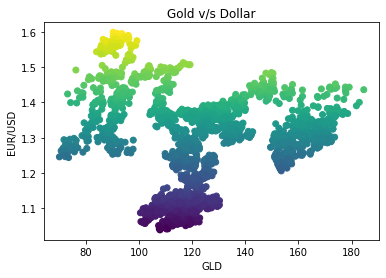

In [12]:
plt.scatter(data['GLD'],data['EUR/USD'],c=data['EUR/USD'])
plt.xlabel("GLD")
plt.ylabel("EUR/USD")
plt.title("Gold v/s Dollar")

### Splitting data into dependent (target value) and independent variables (feature values)

In [13]:
X = data.drop(['Date','GLD'],axis=1)  
Y = data['GLD']                       

In [14]:
X    #independent

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y    #dependent

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

## Train and Test Split 

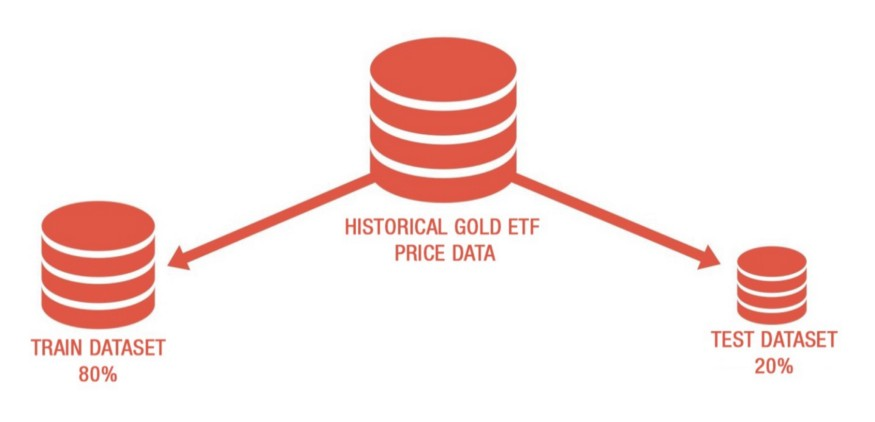

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1832, 4)

In [17]:
x_test.shape

(458, 4)

# Model Training

## 1) Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state = 0)

In [19]:
# training the model using fit() method.
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

### Model Evaluation 

In [20]:
# prediction on Test Data using the predict() method.
prediction = regressor.predict(x_test)

In [21]:
# R squared error
from sklearn import metrics
error_score = metrics.r2_score(y_test, prediction)
print("R squared error : ", error_score)

R squared error :  0.9899648553789232


### Comparing the Actual Values and the Predicted Values :  

In [22]:
# Converting the values of Y_test into a list.
y_test = list(y_test)

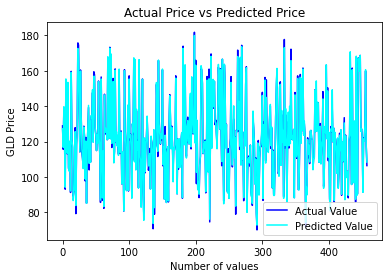

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(prediction, color='cyan', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.style.use("dark_background")
plt.show()

## 2) Linear Regression 

In [24]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [25]:
predicted_y = lnr.predict(x_test)           # test the model
# print("predicted y records:",predicted_y)
# print("real answers",y_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_y)

0.8530125466873726

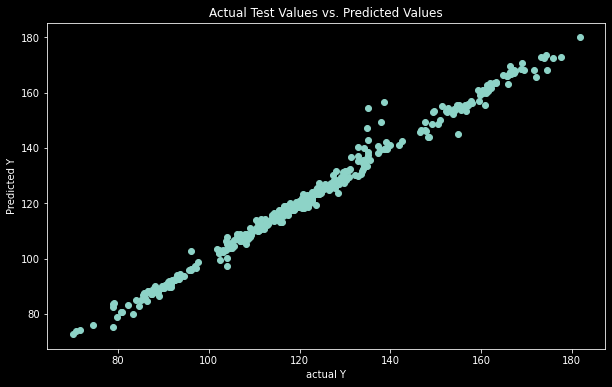

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,prediction)
plt.xlabel('actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Test Values vs. Predicted Values')
plt.style.use("dark_background")
plt.show()

# Random Forest is the best model with 98.99% Accuracy 

##  Loading and Saving model

In [28]:
import pickle
# Save trained model to file
pickle.dump(regressor, open("Gold.pkl", "wb"))

In [29]:
loaded_model = pickle.load(open("Gold.pkl", "rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)

0.9899648553789232

## Predicting the Outcome Using New data

In [30]:
x_test.head(1)

,SPX,USO,SLV,EUR/USD
1255,1692.77002,36.880001,20.98,1.351698


In [ ]:
SPX = input()
USO = input()
SLV = input()
Dollar = input()

In [ ]:
row_df = pd.DataFrame([pd.Series([SPX,USO,SLV,Dollar])])
row_df

In [ ]:
price = loaded_model.predict(row_df)
print(f"The predicted Gold Price is ${price}")